In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read top five values

In [7]:
df=pd.read_csv("Car_sales.csv")
df.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


### 2. Print dataframe info_data types of each column

In [8]:
df.dtypes

Manufacturer            object
Model                   object
Sales in thousands     float64
4-year resale value     object
Vehicle type            object
Price in thousands      object
Engine size             object
Horsepower              object
Wheelbase               object
Width                   object
Length                  object
Curb weight             object
Fuel capacity           object
Fuel efficiency         object
Latest Launch           object
dtype: object

df.dtypes

### 3. Print number of rows and columns

In [9]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 157
Number of columns: 15


### 4. Drop duplicate rows_if any

In [10]:
df_cleaned = df.drop_duplicates()

### 5. Print number of rows and columns after dropping duplicates

In [11]:
print("Number of rows after removing duplicates:", df_cleaned.shape[0])
print("Number of columns after removing duplicates:",df_cleaned.shape[1])

Number of rows after removing duplicates: 157
Number of columns after removing duplicates: 15


### 6. Print summary statistics for numerical variables

In [12]:
df.describe()

,Sales in thousands
count,157.000000
mean,52.998076
std,68.029422
min,0.110000
25%,14.114000
50%,29.450000
75%,67.956000
max,540.561000


### 7. Print number of missing values in each column

In [13]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64

### 8. Drop the column with most missing values

In [14]:
column_to_drop=df.isnull().sum().idxmax()
column_to_drop

'Manufacturer'

df.drop(columns=[column_to_drop])

### 9. Drop the rows with categorical missing values

In [15]:
categorical_cols = df.select_dtypes(include=['object','category']).columns
df_cleaned = df.dropna(subset=categorical_cols)
print("Cleaned dataset shape:", df_cleaned.shape)

Cleaned dataset shape: (157, 15)


### 10. Import the rows with numerical missing values

In [16]:
numerical_cols = df.select_dtypes(include=['number']).columns
df_with_missing_numerical = df[ df[numerical_cols].isna().any(axis=1) ]
df_with_missing_numerical

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch


### 11. Sort the data w.r.t price_find the details of the most and the least expensive cars

In [18]:
df.sort_values(by=["Price in thousands"],ascending=[True])
print("Least expensive : ",df.iloc[0].Manufacturer)
print("Most expensive : ",df.iloc[-1].Manufacturer)

Least expensive :  Acura        
Most expensive :  Volvo        


### 12. Write a function to find min and max values of any column

In [21]:
def find_min_max(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()

    return min_value, max_value

### 13. Call the above function to find min max of horse power, length, fuel efficiency

In [22]:
minhp,maxhp=find_min_max(df,"Horsepower")
minlen,maxlen=find_min_max(df,"Length")
minfe,maxfe=find_min_max(df,"Fuel efficiency")
print("min & max hp: ",minhp,maxhp)
print("min & max length ",minlen,maxlen)
print("min & max fe ",minfe,maxfe)

min & max hp:  . 92
min & max length  . 224.5
min & max fe  . 45


###  14. Plot histogram of continuous numerical variable price,sales,hoursepower,fuelefficiency

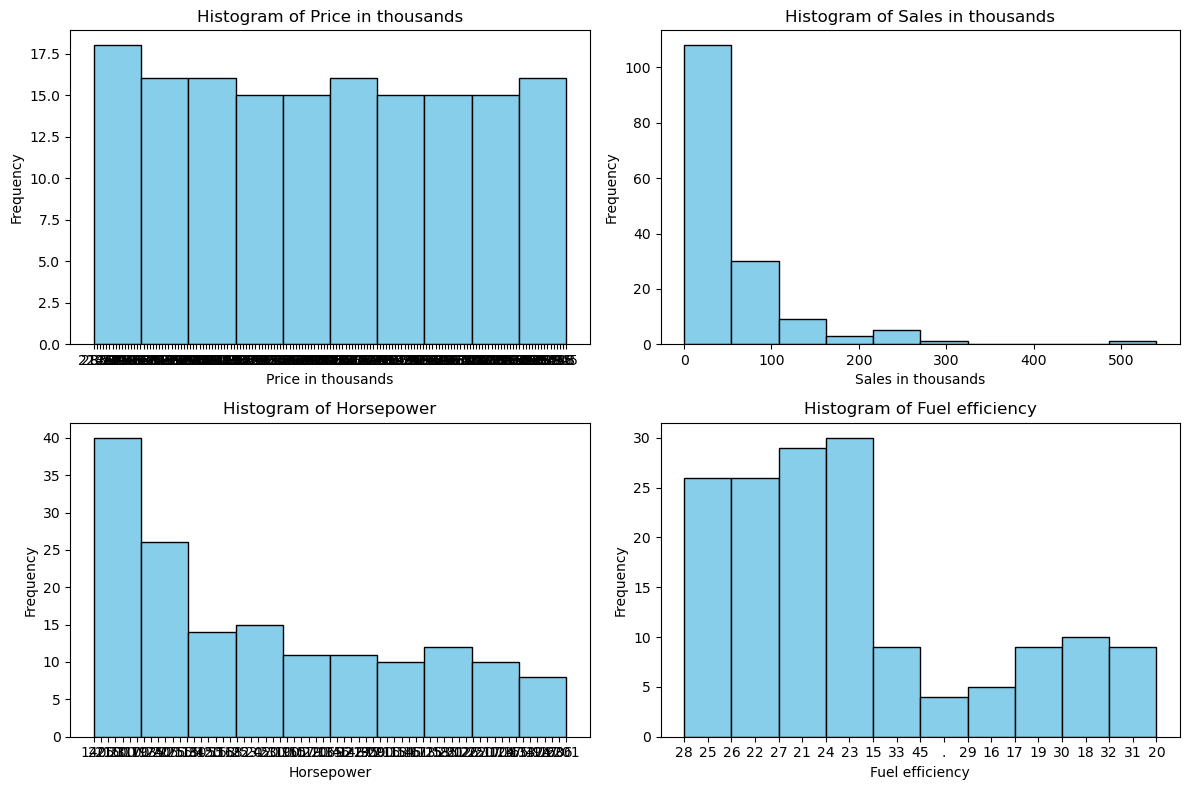

In [19]:
vars_to_plot = ['Price in thousands', 'Sales in thousands', 'Horsepower', 'Fuel efficiency']

plt.figure( figsize=(12, 8) )

for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 2, i + 1)  # 2x2 grid
    plt.hist(df[var].dropna(), color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 15. Probability density distribution of continuous numerical variable-length

In [20]:
from scipy.stats import gaussian_kde
df.columns = df.columns.str.strip()
if "Length" in df.columns:
    df["Length"] = pd.to_numeric(df["Length"], errors="coerce")
    data = df["Length"].dropna()
    kde = gaussian_kde(data)
    density_values = kde.evaluate(data)
    result = pd.DataFrame({'Length': data, 'Density': density_values})
    print(result.head())
else:
    print("Error: 'Length' column not found in the dataset.")

   Length   Density
0   172.4  0.016206
1   192.9  0.027570
2   192.0  0.028122
3   196.6  0.023728
4   178.0  0.023772


### 16. Count by category –group by manufacture

In [21]:
manufacturer_counts = df.groupby('Manufacturer').size().reset_index(name='Count')
print(manufacturer_counts)

     Manufacturer  Count
0   Acura              4
1   Audi               3
2   BMW                3
3   Buick              4
4   Cadillac           5
5   Chevrolet          9
6   Chrysler           7
7   Dodge             11
8   Ford              11
9   Honda              5
10  Hyundai            3
11  Infiniti           1
12  Jaguar             1
13  Jeep               3
14  Lexus              6
15  Lincoln            3
16  Mercedes-Benz      9
17  Mercury            6
18  Mitsubishi         7
19  Nissan             7
20  Oldsmobile         6
21  Plymouth           4
22  Pontiac            6
23  Porsche            3
24  Saab               2
25  Saturn             5
26  Subaru             2
27  Toyota             9
28  Volkswagen         6
29  Volvo              6


### 17. Select all numerical variables

In [22]:
df.select_dtypes(include=['number'])

,Sales in thousands,Length
0,16.919,172.4
1,39.384,192.9
2,14.114,192.0
3,8.588,196.6
4,20.397,178.0
...,...,...
152,3.545,176.6
153,15.245,185.9
154,17.531,186.2
155,3.493,185.7


### 18. Print correlation coefficient value of price and sales

In [64]:
data = {
"price": [20000, 25000, 30000, 35000, 40000, 45000, 50000],
"sales": [250, 200, 150, 130, 120, 100, 90]
}
df = pd.DataFrame(data)
correlation = df["price"].corr(df["sales"])
print(f"The correlation coefficient between price and sales is:{correlation}")

The correlation coefficient between price and sales is:-0.9514998746685429


### 19. Plot correlation of price and sales using scatterplot

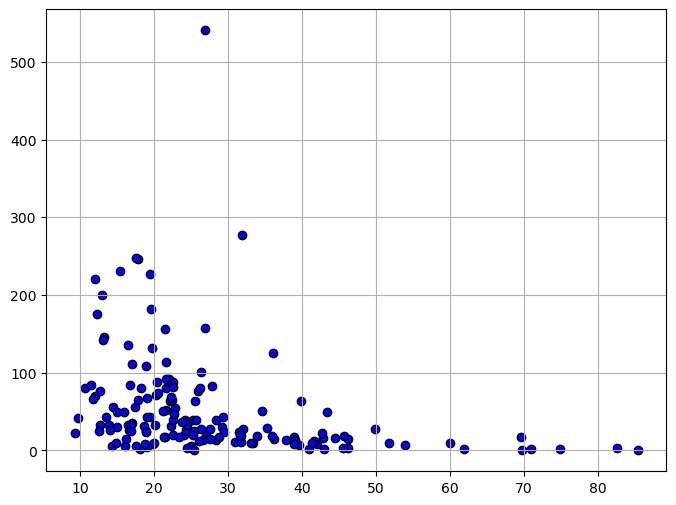

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Price in thousands"], df["Sales in thousands"], color="blue", edgecolors="black")
plt.grid(True)
plt.show()

### 20. Plot correlation of price and sales using Pair plot

/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


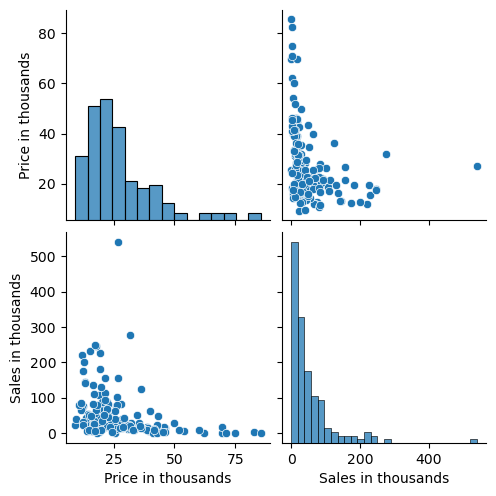

In [28]:
cols = ['Price in thousands', 'Sales in thousands']
sns.pairplot(df[cols])
plt.show()

### 21. Boxplot of sales of different manufacturer

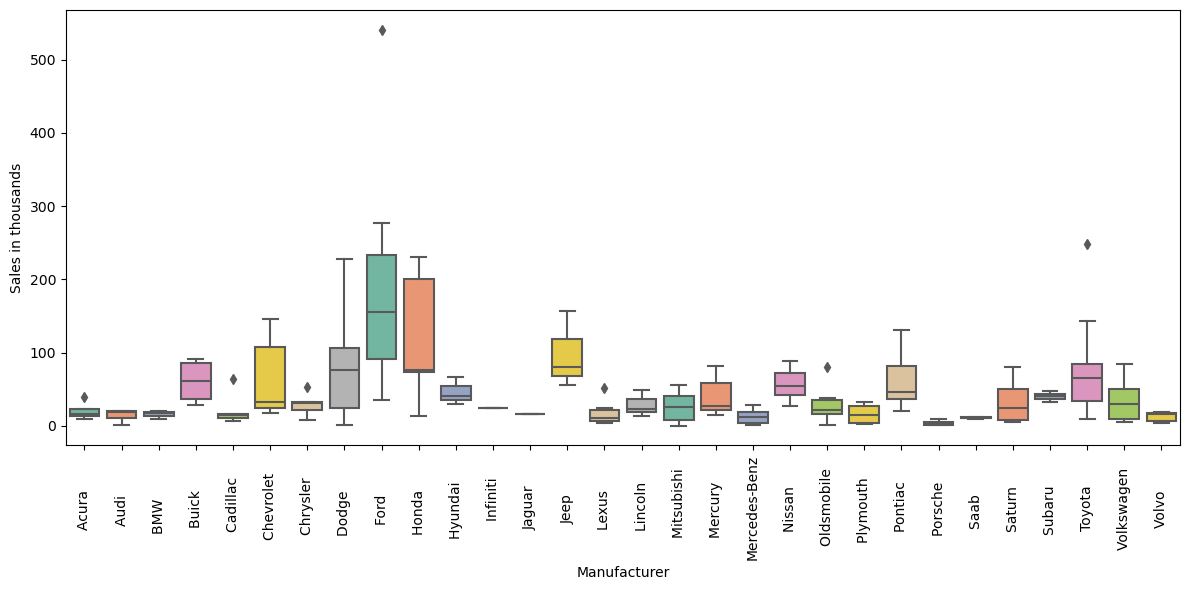

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Manufacturer', y='Sales in thousands', palette='Set2')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 22. Boxplot of other numerical variables w.r.t manufacture

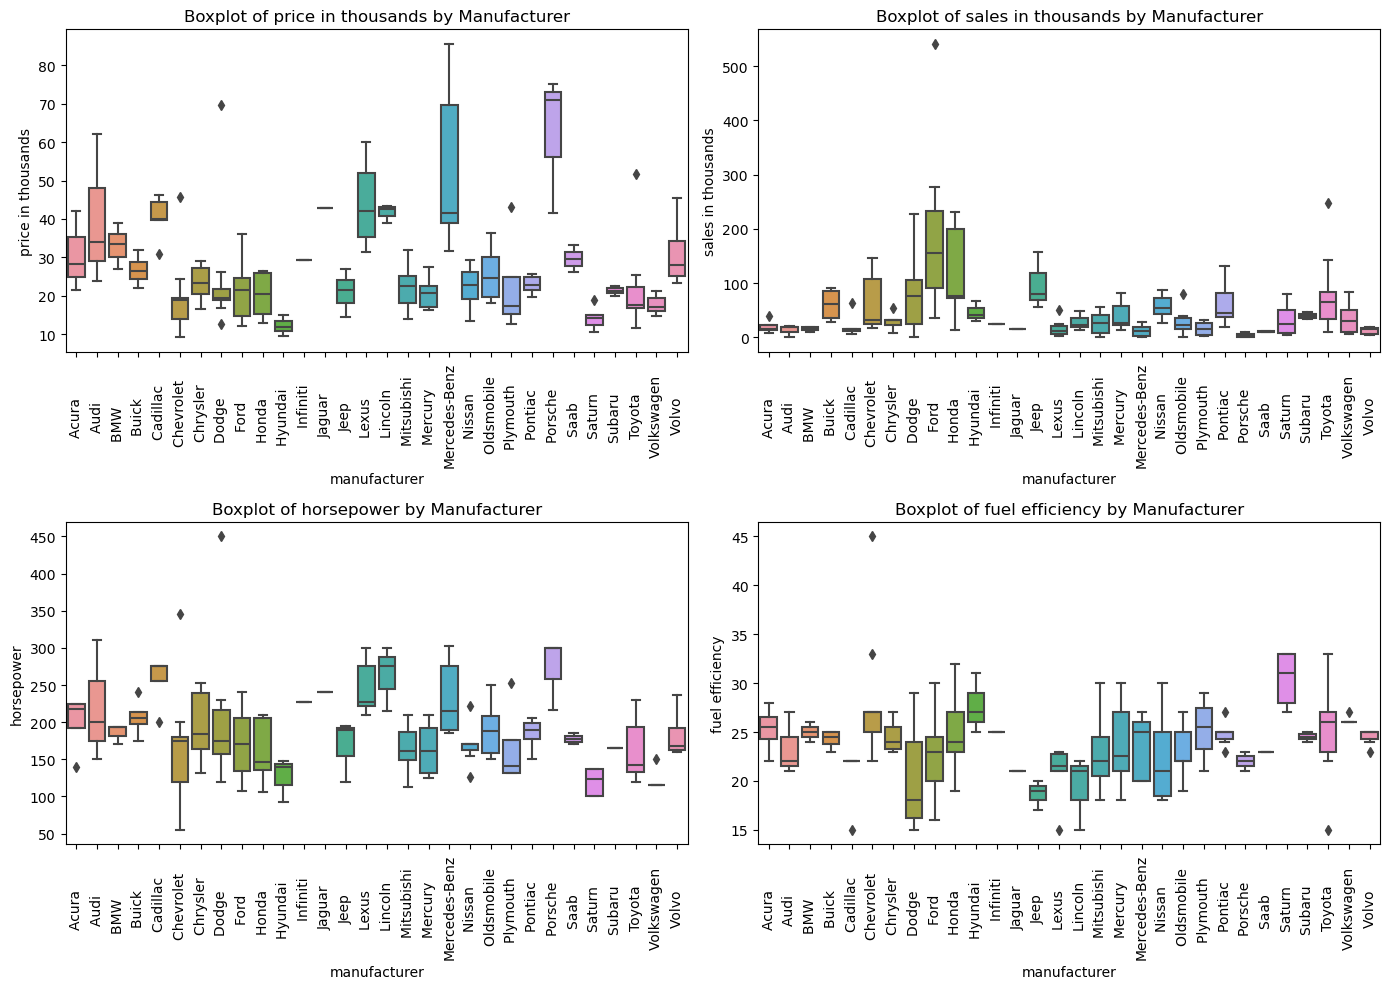

In [26]:
df.columns = df.columns.str.strip()

# Replace "." with NaN and convert all numerical columns to numeric
df.replace(".", pd.NA, inplace=True)

# Identify numerical columns (excluding Manufacturer)
numerical_cols = df.select_dtypes(include=['object']).columns.difference(['manufacturer'])
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Define numerical columns to plot (excluding categorical variables)
num_vars = ["price in thousands", "sales in thousands", "horsepower", "fuel efficiency"]

# Plot boxplots for each numerical variable by Manufacturer
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Manufacturer", y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f"Boxplot of {col} by Manufacturer")

plt.tight_layout()
plt.show()

### 23. Divide the data into input and output y=sales in thousand, x=all other variables

In [32]:
df["Sales in thousands"] = pd.to_numeric(df["Sales in thousands"], errors='coerce')
y = df["Sales in thousands"]
X = df.drop(columns=["Sales in thousands"])

print(X.shape)
print(y.shape)

(157, 14)
(157,)


### 24. Encode other categorical variables using label encoder

In [32]:
from sklearn.preprocessing import LabelEncoder
df.columns = df.columns.str.strip()

# Replace "." with NaN
df.replace(".", pd.NA, inplace=True)

# Convert "Sales in thousands" to numeric (Target Variable)
df["sales in thousands"] = pd.to_numeric(df["sales in thousands"], errors='coerce')

# Identify categorical columns (excluding "Sales in thousands" if present)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Check if "Sales in thousands" is in the list before removing
if "sales in thousands" in categorical_cols:
    categorical_cols.remove("sales in thousands")

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Store encoder for future use

# Define X (features) and y (target)
y = df["sales in thousands"]
X = df.drop(columns=["sales in thousands"])

# Print encoded columns and dataset shapes
print("Encoded categorical variables:", categorical_cols)
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Display first few rows to verify encoding
df.head()

Encoded categorical variables: ['manufacturer']
Shape of X (features): (157, 14)
Shape of y (target): (157,)


,manufacturer,model,sales in thousands,4-year resale value,vehicle type,price in thousands,engine size,horsepower,wheelbase,width,length,curb weight,fuel capacity,fuel efficiency,latest launch
0,0,NaN,16.919,16.360,NaN,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,NaN
1,0,NaN,39.384,19.875,NaN,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,NaN
2,0,NaN,14.114,18.225,NaN,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,0,NaN,8.588,29.725,NaN,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,NaN
4,1,NaN,20.397,22.255,NaN,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,NaN


### 25. Encode categorical variable vehicle type using one-hot encoder

In [33]:
df.columns = df.columns.str.strip()

# Replace "." with NaN
df.replace(".", pd.NA, inplace=True)

# Convert "Sales in thousands" to numeric (Target Variable)
df["sales in thousands"] = pd.to_numeric(df["sales in thousands"], errors='coerce')

# One-Hot Encode "Vehicle Type"
if "Vehicle Type" in df.columns:
    encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
    vehicle_encoded = encoder.fit_transform(df[["Vehicle Type"]])  # Transform into numerical array
    
    # Convert to DataFrame and add column names
    vehicle_encoded_df = pd.DataFrame(vehicle_encoded, columns=encoder.get_feature_names_out(["Vehicle Type"]))
    
    # Concatenate with original DataFrame (dropping the original "Vehicle Type" column)
    df = pd.concat([df.drop(columns=["Vehicle Type"]), vehicle_encoded_df], axis=1)

# Define X (features) and y (target)
y = df["sales in thousands"]
X = df.drop(columns=["sales in thousands"])

# Print new column names
print("Updated feature columns:", X.columns.tolist())
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Display first few rows to verify encoding
df.head()

Updated feature columns: ['manufacturer', 'model', '4-year resale value', 'vehicle type', 'price in thousands', 'engine size', 'horsepower', 'wheelbase', 'width', 'length', 'curb weight', 'fuel capacity', 'fuel efficiency', 'latest launch']
Shape of X (features): (157, 14)
Shape of y (target): (157,)


,manufacturer,model,sales in thousands,4-year resale value,vehicle type,price in thousands,engine size,horsepower,wheelbase,width,length,curb weight,fuel capacity,fuel efficiency,latest launch
0,0,NaN,16.919,16.360,NaN,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,NaN
1,0,NaN,39.384,19.875,NaN,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,NaN
2,0,NaN,14.114,18.225,NaN,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,0,NaN,8.588,29.725,NaN,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,NaN
4,1,NaN,20.397,22.255,NaN,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,NaN


### 26.Split the data set into train and test set 70% train set 10% test set

In [34]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

y = df["Sales in thousands"]
X = df.drop(columns=["Sales in thousands"])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% temp (test + validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)  # 10% test, 20% validation

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(109, 14) (109,)
(16, 14) (16,)
(32, 14) (32,)


### 27. Apply feature scaling on numerical variables

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
df.columns = df.columns.str.strip()

# Replace "." with NaN
df.replace(".", pd.NA, inplace=True)

# Convert "Sales in thousands" to numeric (Target Variable)
df["sales in thousands"] = pd.to_numeric(df["sales in thousands"], errors='coerce')

# One-Hot Encode "Vehicle Type" if it exists
if "Vehicle Type" in df.columns:
    encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
    vehicle_encoded = encoder.fit_transform(df[["Vehicle Type"]])
    
    # Convert to DataFrame and add column names
    vehicle_encoded_df = pd.DataFrame(vehicle_encoded, columns=encoder.get_feature_names_out(["Vehicle Type"]))
    
    # Concatenate with original DataFrame (dropping the original "Vehicle Type" column)
    df = pd.concat([df.drop(columns=["Vehicle Type"]), vehicle_encoded_df], axis=1)

# Define X (features) and y (target)
y = df["sales in thousands"]
X = df.drop(columns=["sales in thousands"])

# Split the data into 70% train, 10% test, and 20% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% temp (test + validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)  # 10% test, 20% validation

# Identify numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Apply Standard Scaling
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])

# Print scaled dataset information
print("Scaled numerical variables:", numerical_cols)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)

# Display first few rows to verify scaling
X_train.head()

Scaled numerical variables: ['manufacturer', 'model', '4-year resale value', 'vehicle type', 'price in thousands', 'engine size', 'horsepower', 'wheelbase', 'width', 'length', 'curb weight', 'fuel capacity', 'fuel efficiency', 'latest launch']
X_train shape: (109, 14)
X_test shape: (32, 14)
X_val shape: (16, 14)


/home/user/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,manufacturer,model,4-year resale value,vehicle type,price in thousands,engine size,horsepower,wheelbase,width,length,curb weight,fuel capacity,fuel efficiency,latest launch
140,1.512715,NaN,-0.810100,NaN,-1.141028,-0.627320,-0.769503,-0.659128,-1.396887,-0.759621,-1.318314,-0.751778,-0.225534,NaN
11,-1.295846,NaN,-0.332302,NaN,-0.059247,0.751325,1.058239,0.169629,0.457873,0.709260,0.291298,-0.093909,-0.225534,NaN
79,0.459505,NaN,-0.953497,NaN,-0.947875,-1.218167,-1.310366,-1.371569,-1.396887,-1.187695,-1.869895,-1.272592,1.536003,NaN
68,-0.125612,NaN,-0.328287,NaN,-0.348309,0.948274,0.125718,-0.935381,-0.529338,-1.699705,-0.292040,0.591372,-0.980478,NaN
149,1.629739,NaN,-0.330008,NaN,-0.671932,-1.021218,-1.273065,-1.298871,-0.858408,-2.052237,-1.014109,-0.888834,0.529411,NaN
